In [ ]:
import torch
from torch.nn import Linear

from torch_geometric.nn import GCNConv
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx

from sklearn.manifold import TSNE

import numpy as np
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

import time

In [ ]:
from IPython.display import Javascript
display(Javascript(''' google.colab.output.SetIframeHeight(0, true, {maxHeight: 3000})'''))

<IPython.core.display.Javascript object>

## installations

## handling data

In [ ]:
dataset = KarateClub()

In [ ]:
print(f"Dataset: {dataset}:")
print("==========================")

print(f"Number of graphs:  {len(dataset)}") 
print(f"Number of features:  {dataset.num_features}")
print(f"Number of classes:  {dataset.num_classes}")
print(f"Number of node features:  {dataset.num_node_features}")
print(f"Number of edge features:  {dataset.num_edge_features}")

Dataset: KarateClub():
Number of graphs:  1
Number of features:  34
Number of classes:  4
Number of node features:  34
Number of edge features:  0


In [ ]:
data = dataset[0]
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [ ]:
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Average node degree: {(data.num_edges) / data.num_nodes}")
print(f"Has isolated nodes: {data.has_isolated_nodes()}")
print(f"Has self-loops: {data.has_self_loops()}")
print(f"Is directed: {data.is_directed()}")
print(f"Is undirected: {data.is_undirected()}")

Number of nodes: 34
Number of edges: 156
Average node degree: 4.588235294117647
Has isolated nodes: False
Has self-loops: False
Is directed: False
Is undirected: True


In [ ]:
print(f"Number of training nodes: {data.train_mask.sum()}")
print(f"Training nodel label rate: {int(data.train_mask.sum()) / data.num_nodes: .2f}")

Number of training nodes: 4
Training nodel label rate:  0.12


In [ ]:
data.stores

[{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]), 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
    

In [ ]:
edge_index = data.edge_index
print(edge_index.t()) 

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

In [ ]:
def visualize_graph(G, color):
  plt.figure(figsize=(12, 12))
  plt.xticks([])
  plt.yticks([])
  pos = nx.spring_layout(G, seed=42)
  nx.draw_networkx(G, pos = pos, with_labels=True , node_color=color, cmap="Set2")
  plt.show()

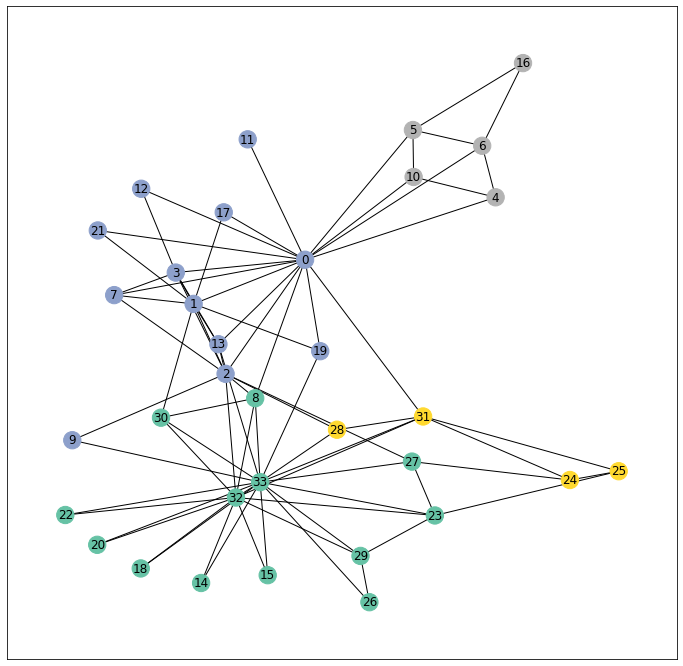

In [ ]:
karate_undirected_graph = to_networkx(data, to_undirected=True)
visualize_graph(karate_undirected_graph, color=data.y)

In [ ]:
display(karate_undirected_graph.number_of_edges())
display(karate_undirected_graph.number_of_nodes())
display(karate_undirected_graph.edges)
display(karate_undirected_graph.degree)

78

34

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

## GNN Experiment

In [ ]:
dataset.num_features, data.x.shape, data.edge_index.shape

(34, torch.Size([34, 34]), torch.Size([2, 156]))

In [ ]:
class GCN(torch.nn.Module):
  def __init__(self):
    super().__init__()

    torch.manual_seed(1234)
    self.conv1 = GCNConv(dataset.num_features, 4)
    self.conv2 = GCNConv(4, 4)
    self.conv3 = GCNConv(4, 2)
    self.classifier = Linear(2, dataset.num_classes)
  
  def forward(self, x , edge_index):
    h = self.conv1(x, edge_index)
    h = h.tanh()
    h = self.conv2(h, edge_index)
    h = h.tanh()
    h = self.conv3(h, edge_index)
    h = h.tanh()

    out = self.classifier(h)
    return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [ ]:
_ ,  h = model(data.x, data.edge_index)
print(f"Embedding shape: {list(h.shape)}")

Embedding shape: [34, 2]


In [ ]:
h

tensor([[ 0.0962,  0.0115],
        [ 0.0235,  0.0129],
        [ 0.0432,  0.0201],
        [ 0.0401,  0.0162],
        [ 0.0522, -0.0054],
        [ 0.0775,  0.0011],
        [ 0.0763,  0.0031],
        [ 0.0300,  0.0131],
        [ 0.0107,  0.0181],
        [ 0.0014,  0.0195],
        [ 0.0575, -0.0035],
        [ 0.0867,  0.0090],
        [ 0.0353,  0.0106],
        [ 0.0242,  0.0179],
        [-0.0114,  0.0138],
        [-0.0109,  0.0173],
        [ 0.0740,  0.0046],
        [ 0.0188,  0.0012],
        [-0.0139,  0.0210],
        [ 0.0068,  0.0108],
        [ 0.0077,  0.0168],
        [ 0.0014,  0.0033],
        [-0.0065,  0.0175],
        [ 0.0657,  0.0242],
        [ 0.1390,  0.0069],
        [ 0.1296,  0.0110],
        [-0.0140,  0.0309],
        [ 0.0852,  0.0189],
        [ 0.0415,  0.0141],
        [ 0.0032,  0.0333],
        [-0.0036,  0.0152],
        [ 0.0995,  0.0135],
        [ 0.0102,  0.0337],
        [ 0.0181,  0.0381]], grad_fn=<TanhBackward0>)

In [ ]:
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(12, 8))
    plt.xticks([])
    plt.yticks([])

    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], c=color, s=140, cmap="Set2")
    if epoch is not None and loss is not None:
      plt.xlabel(f"Epoch: {epoch} | Loss: {loss.item():.4f}", fontsize=16)
    plt.show()

In [ ]:
def visualize_tense(h, color):
  z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
  plt.figure(figsize=(10, 10))
  plt.xticks([])
  plt.yticks([])

  plt.scatter(z[:, 0], z[:, 1], c=color, s=70, cmap="Set2")
  plt.show()

In [ ]:
data.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

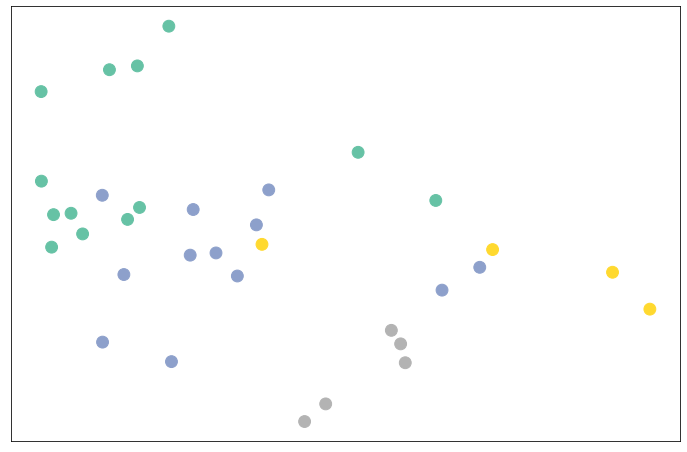

In [ ]:
visualize_embedding(h, color=data.y)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
final_h = h

In [ ]:
def train(data):
    optimizer.zero_grad()
    out, h = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss, h

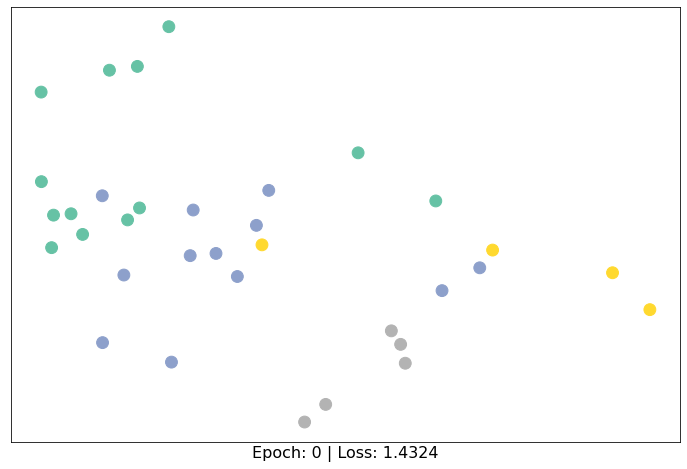

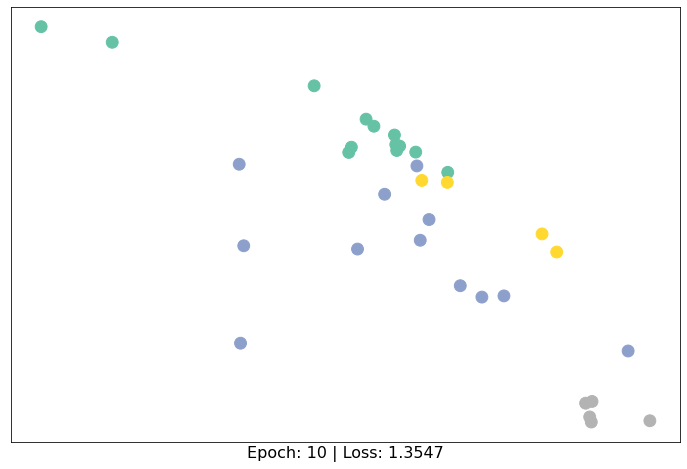

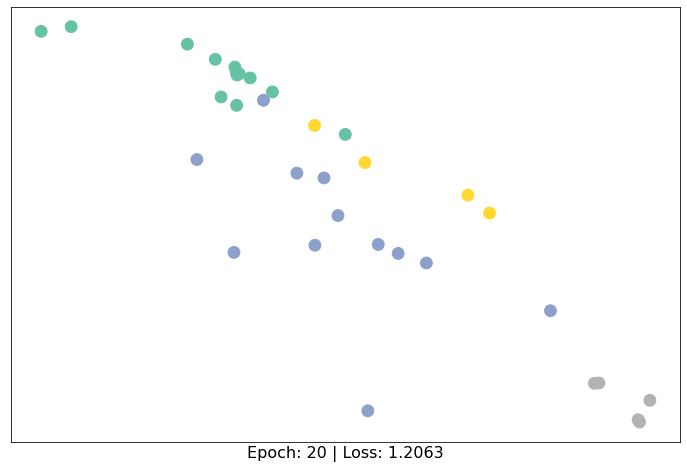

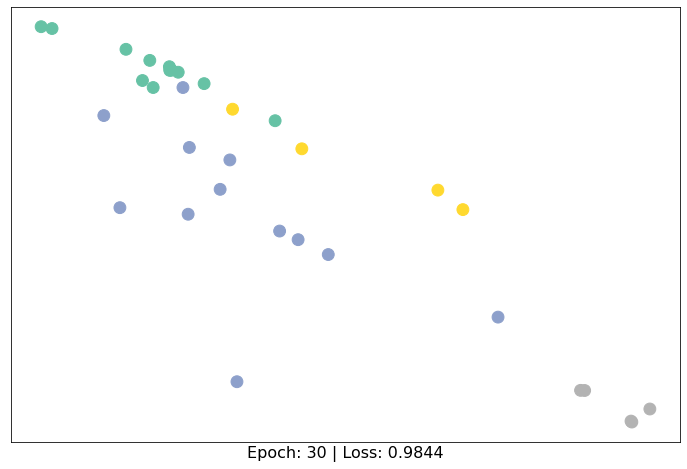

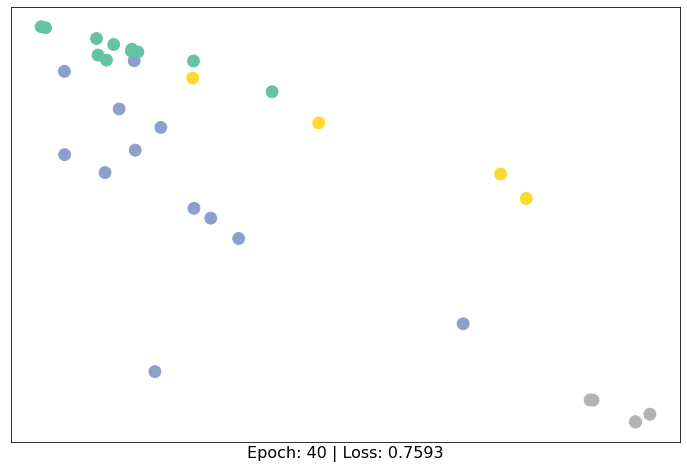

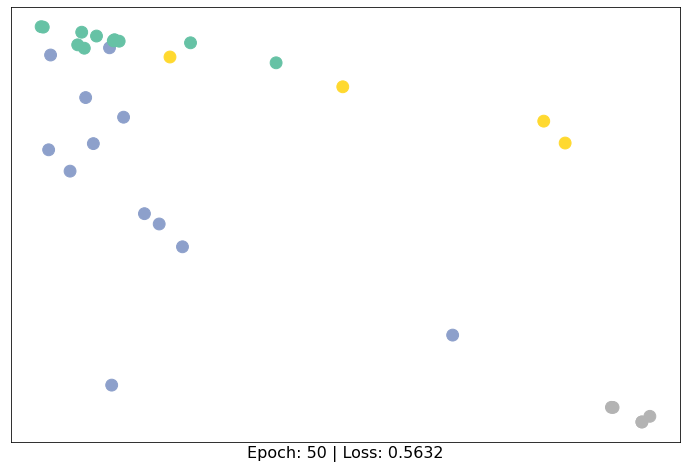

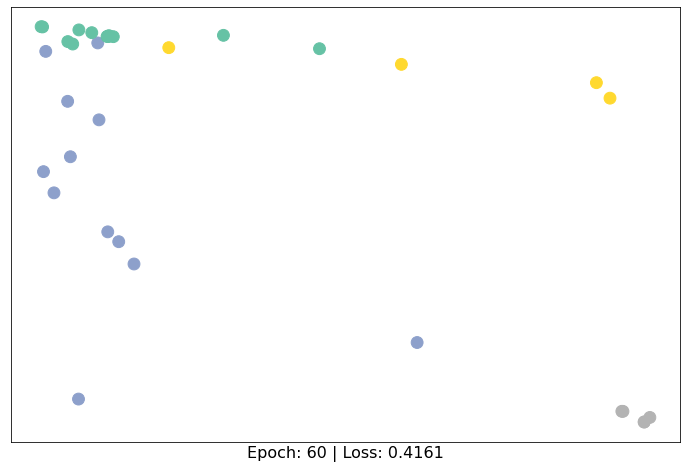

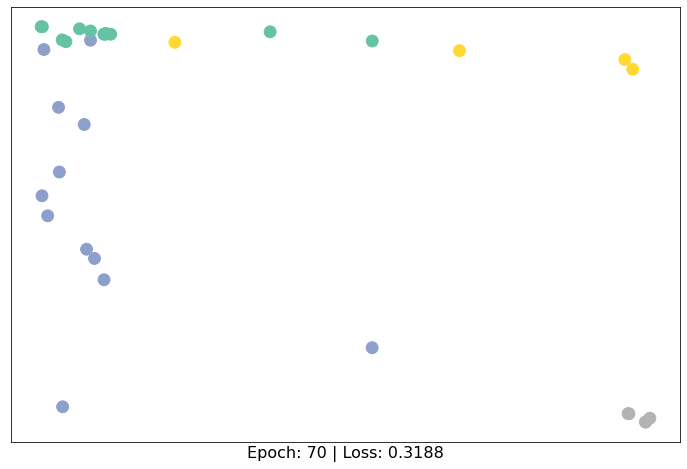

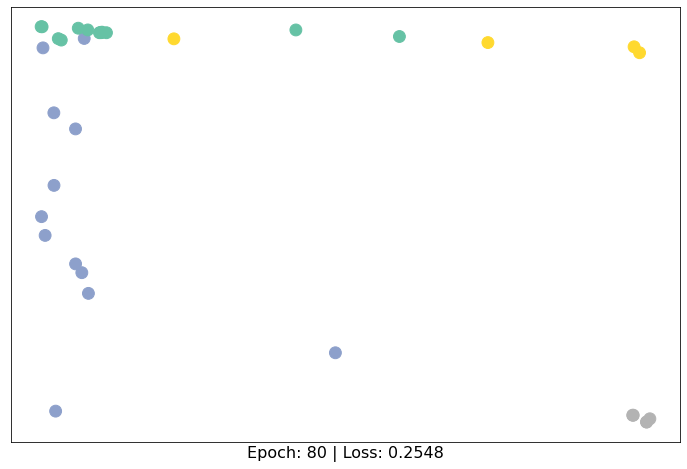

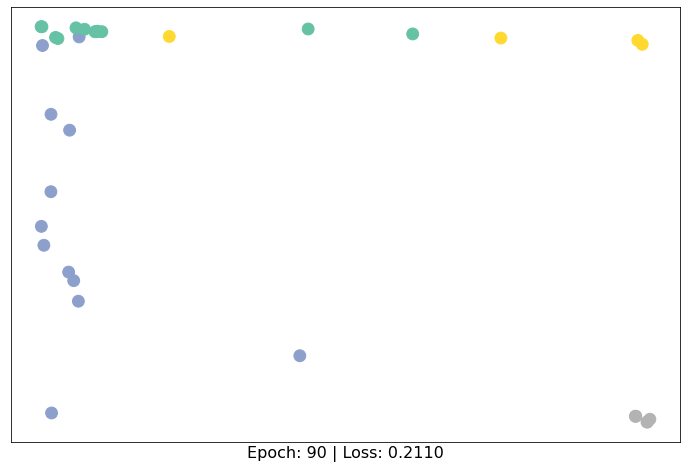

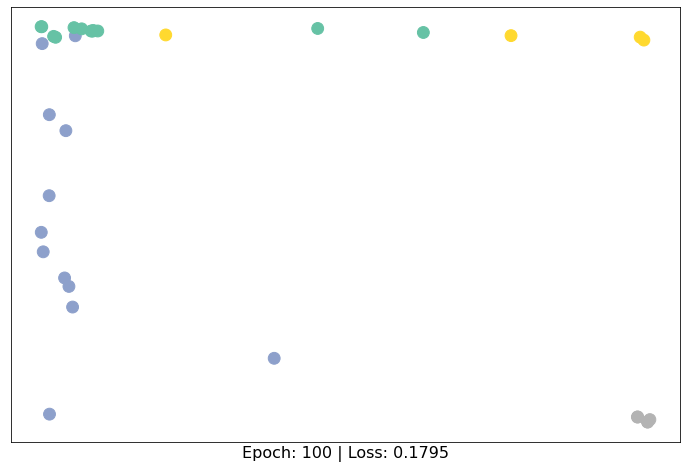

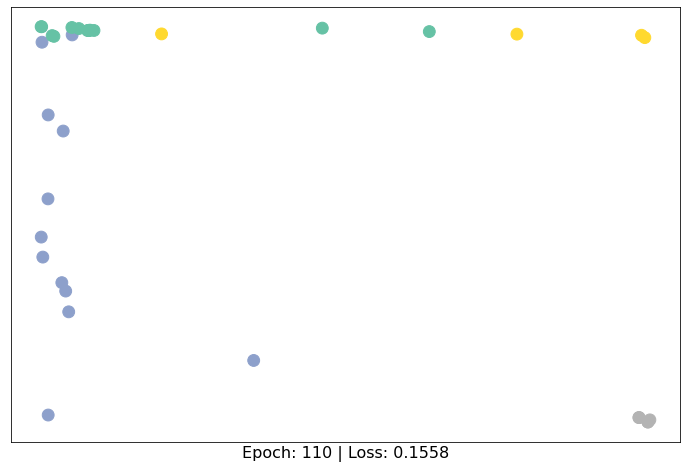

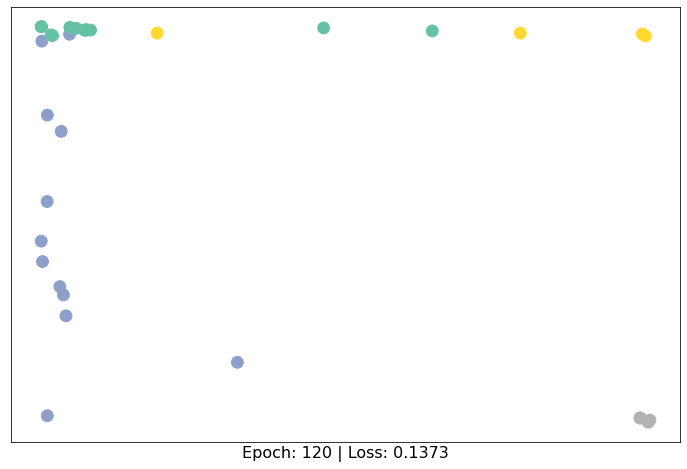

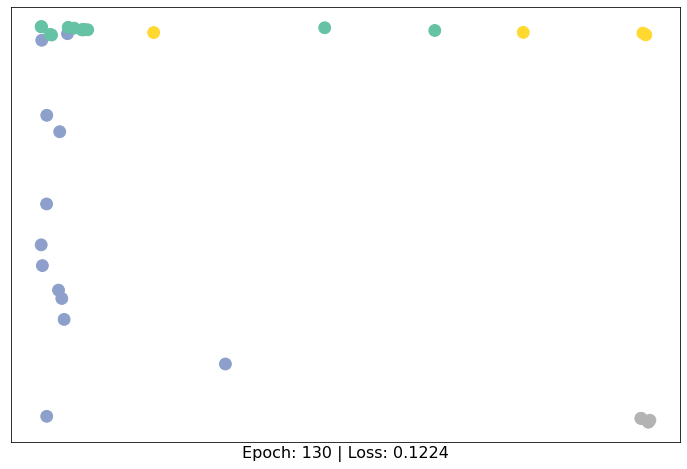

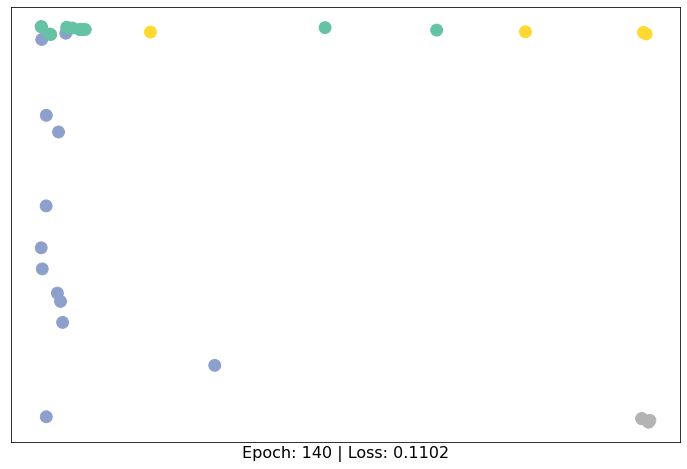

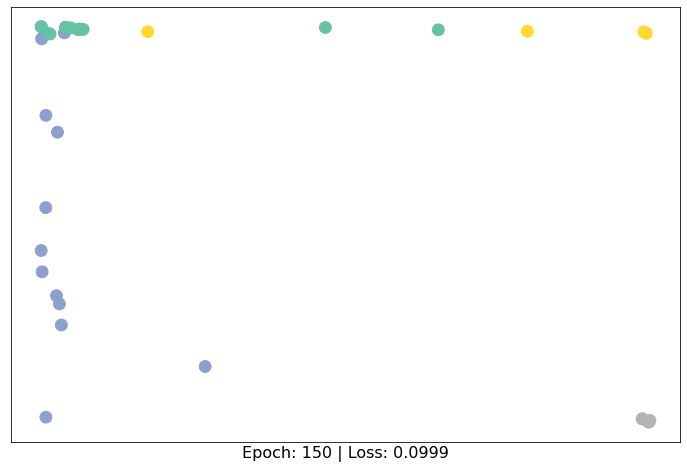

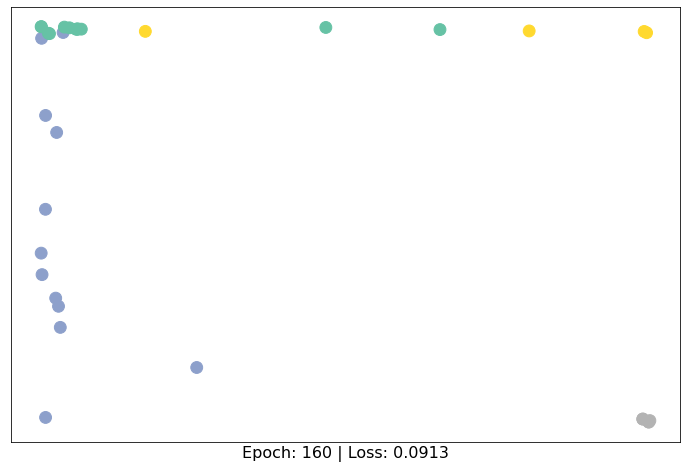

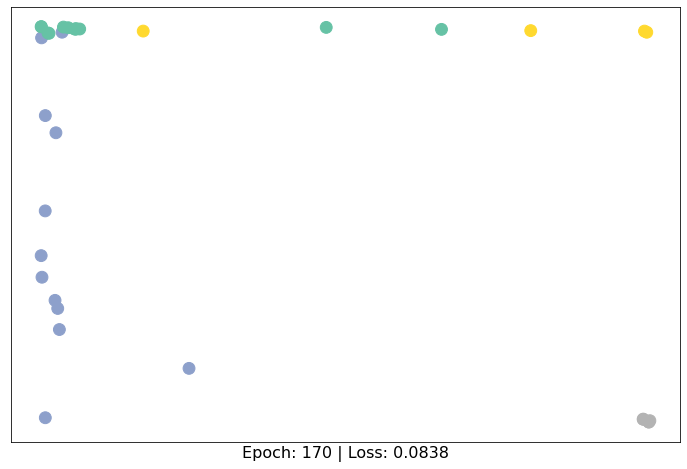

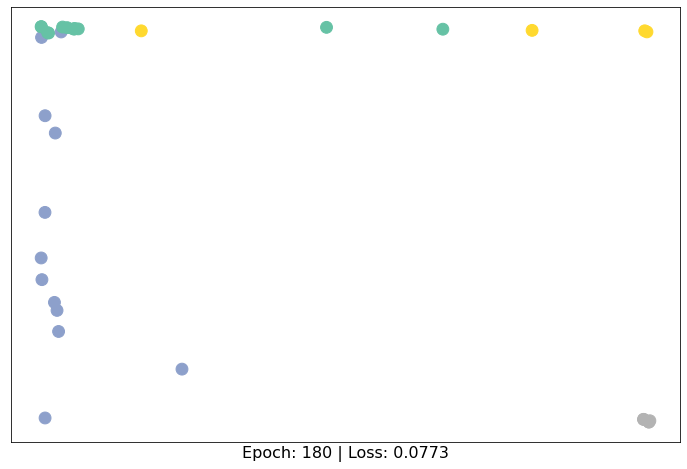

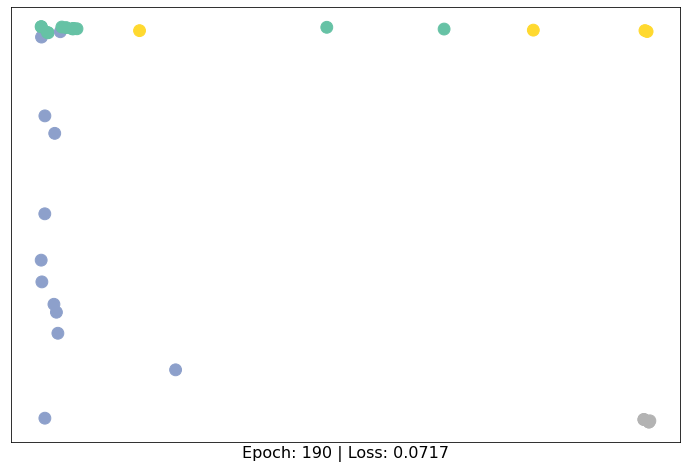

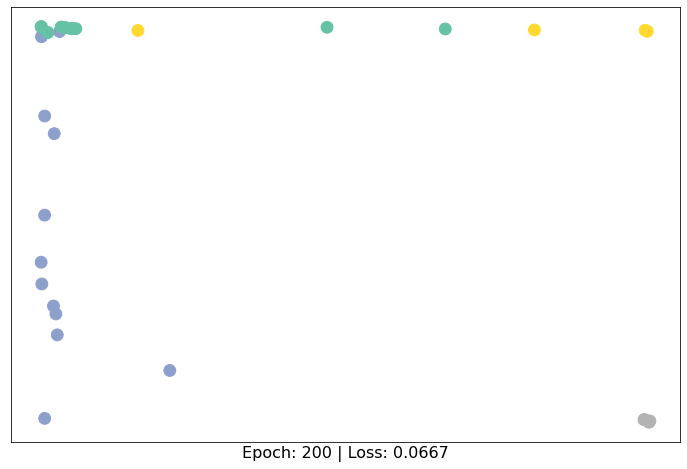

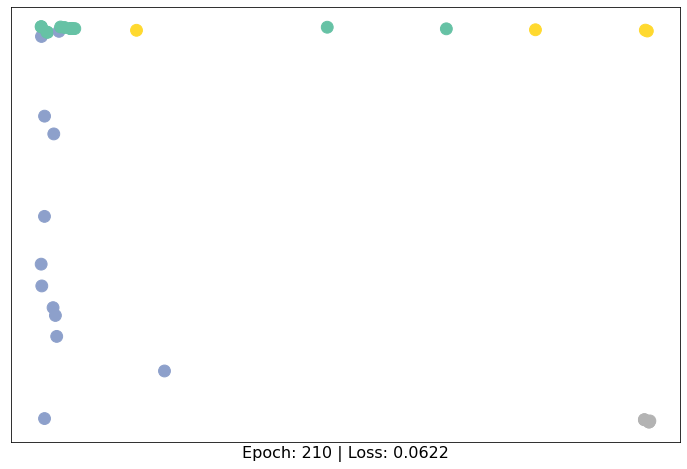

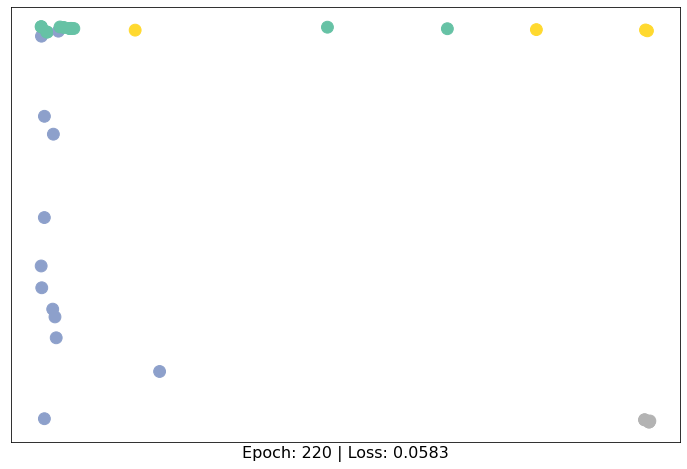

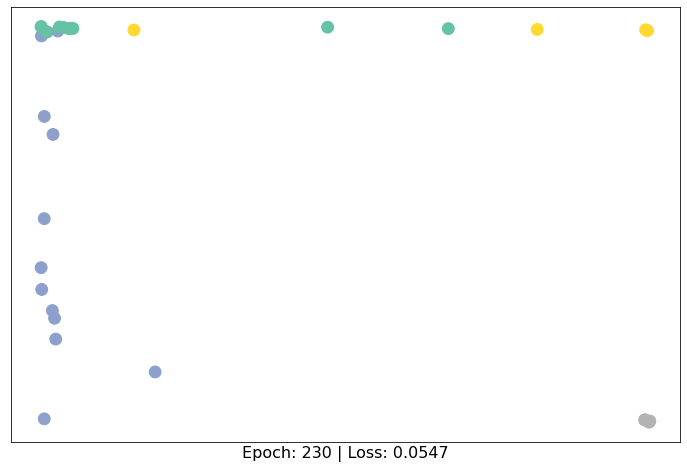

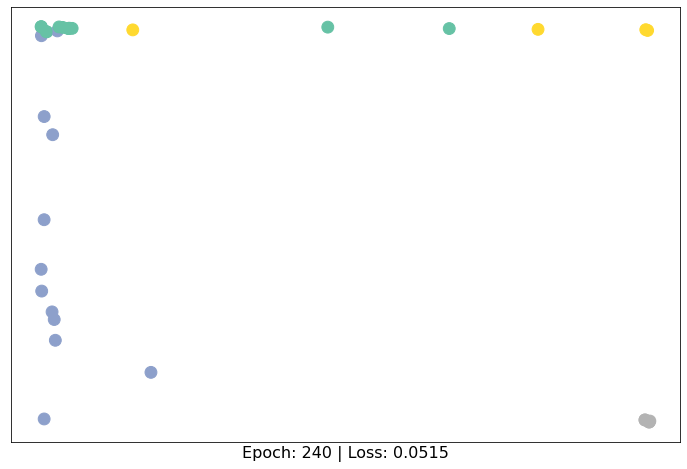

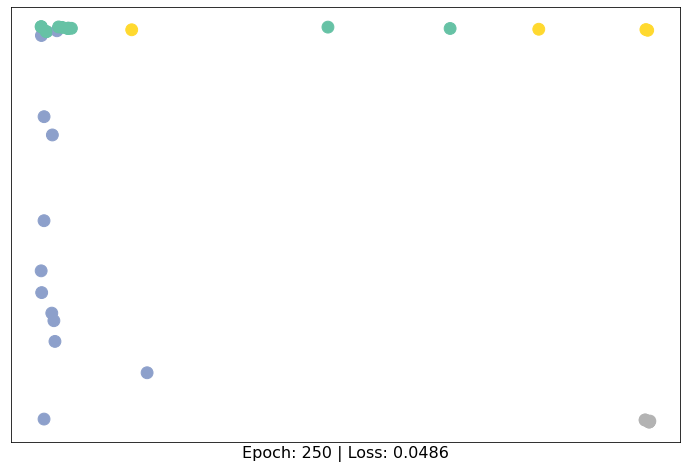

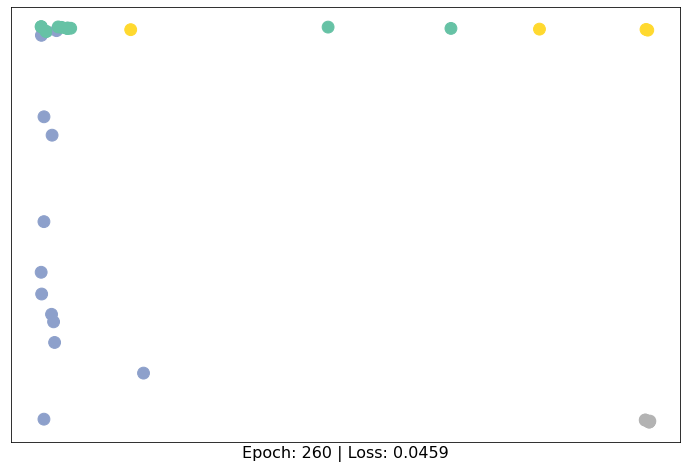

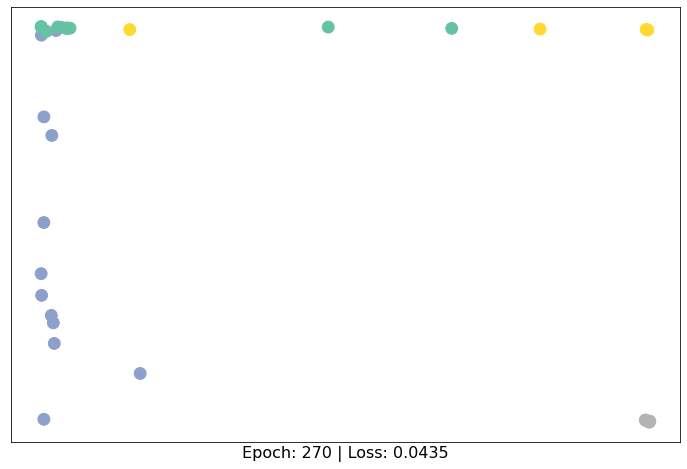

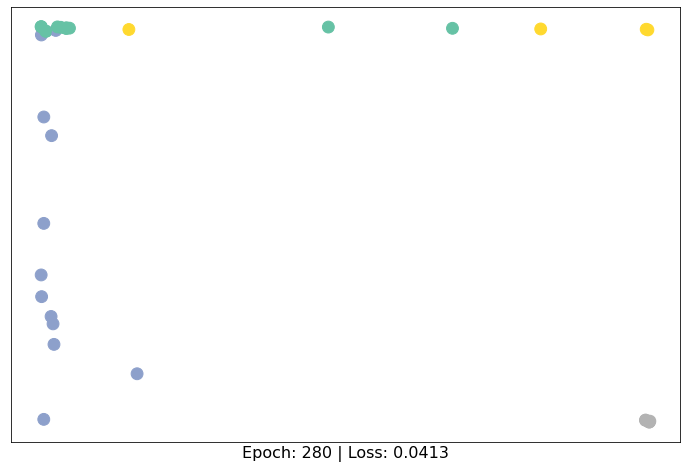

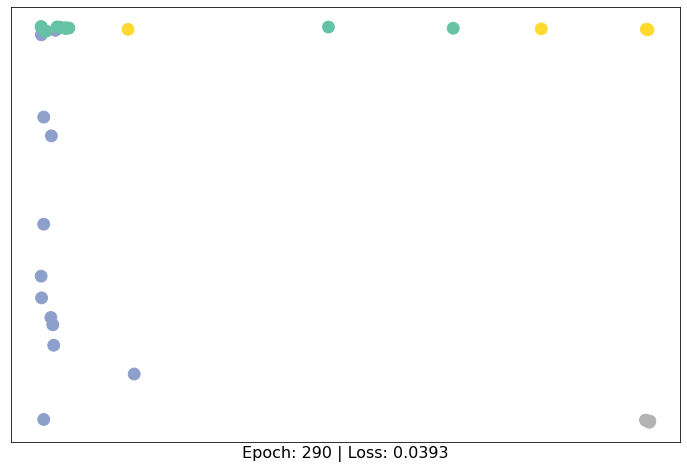

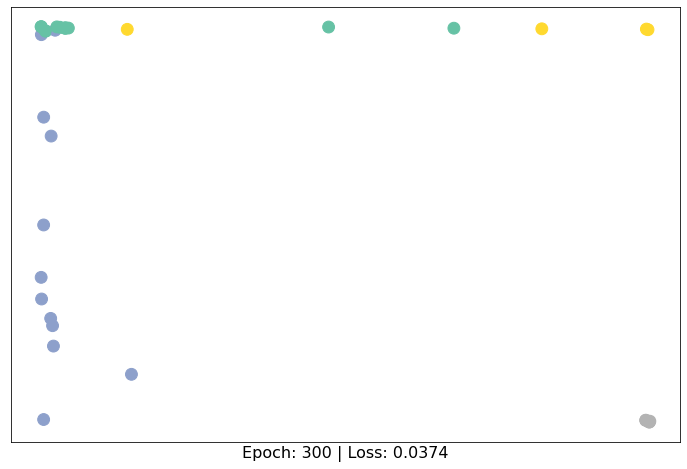

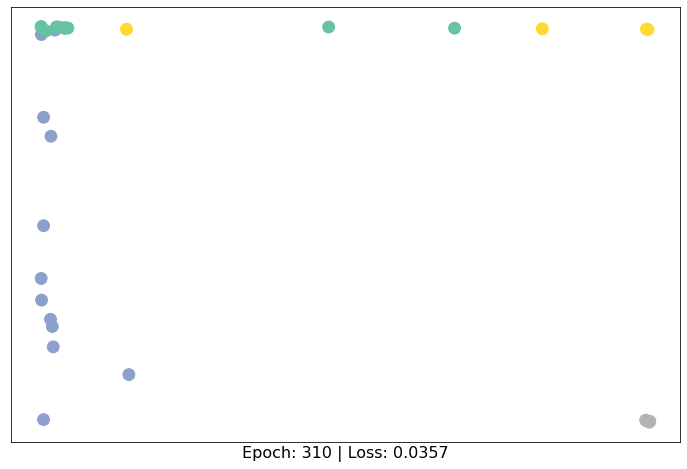

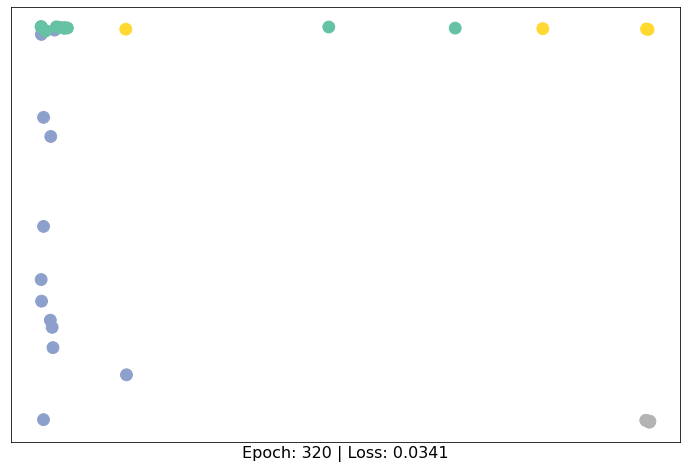

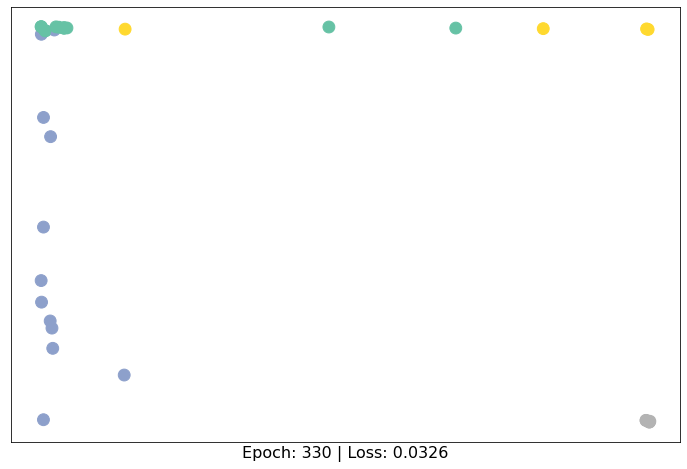

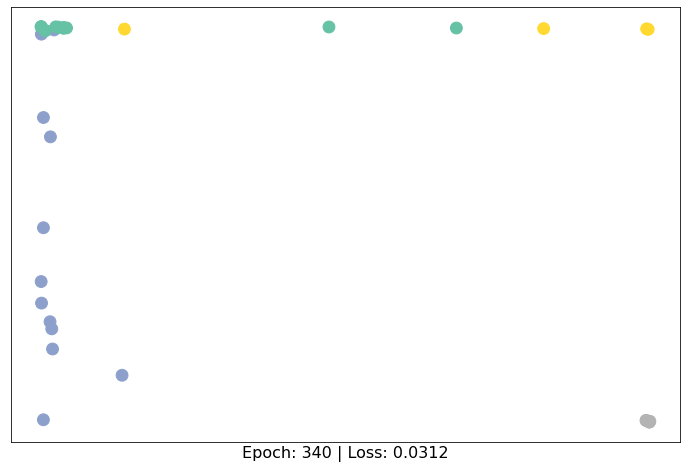

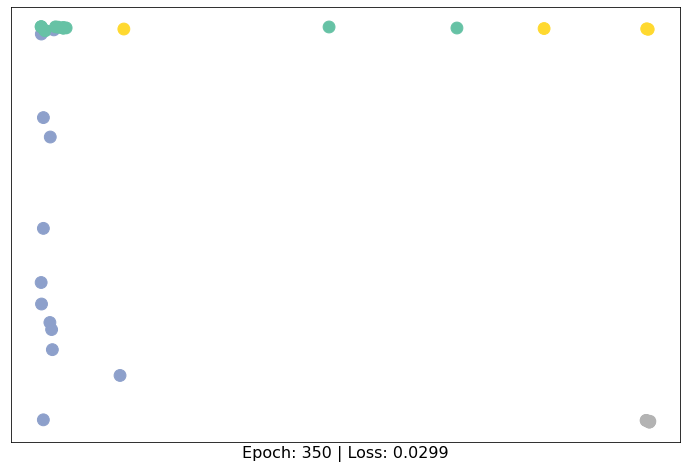

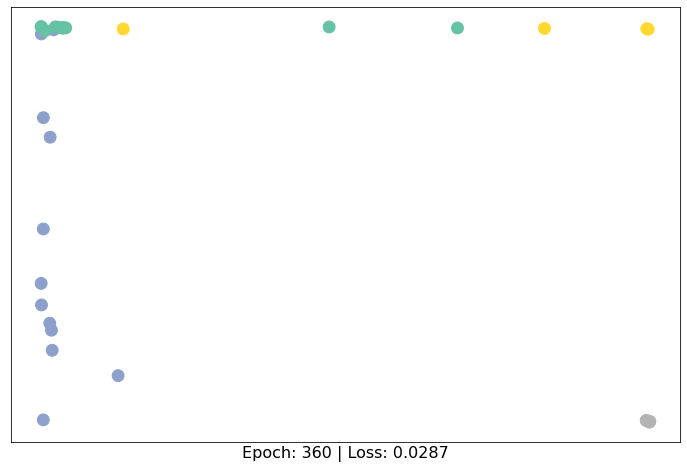

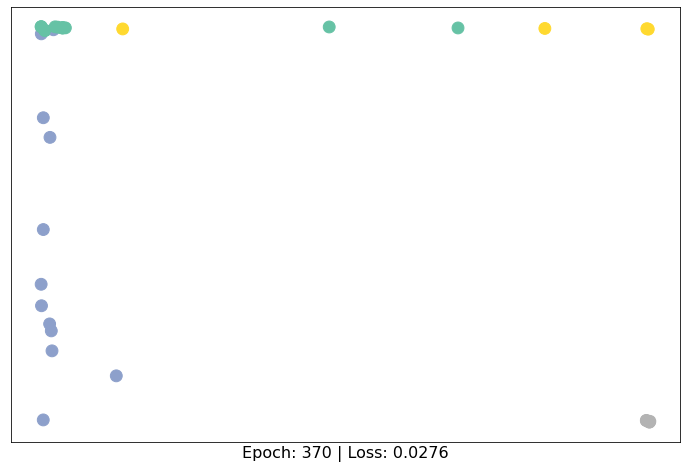

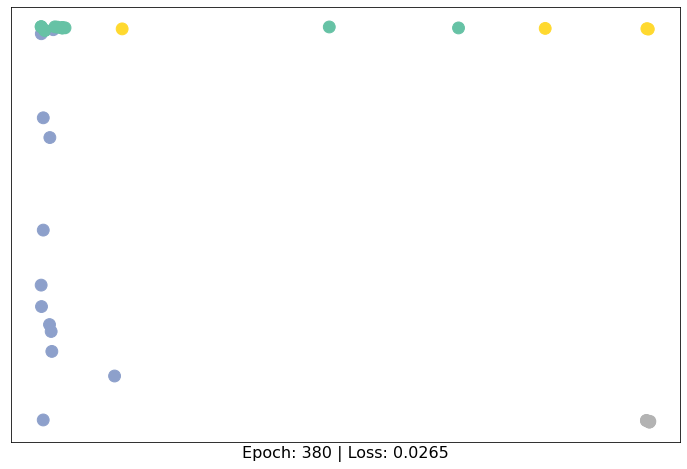

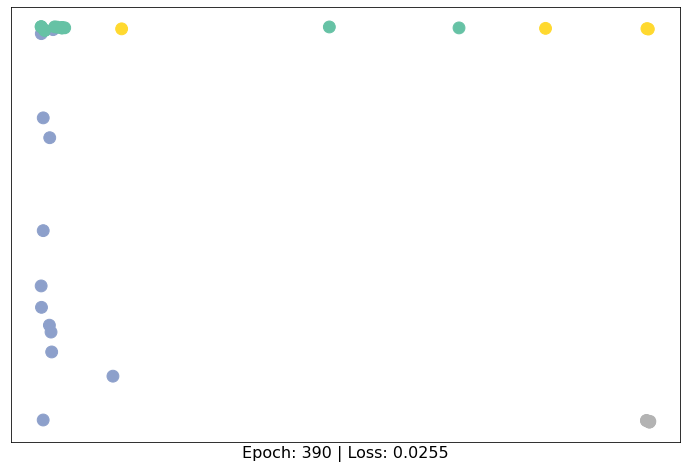

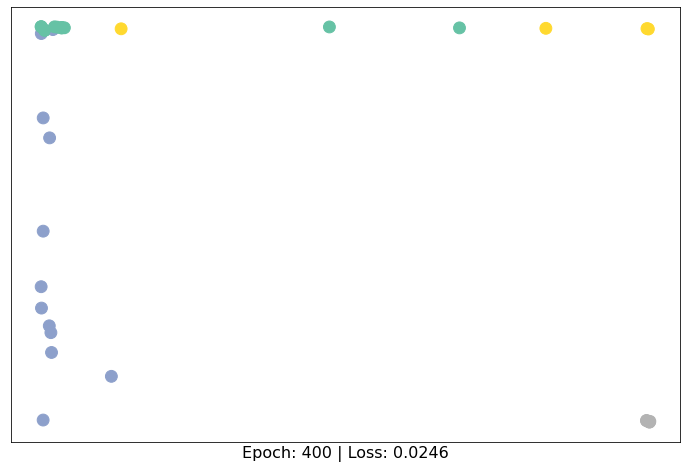

In [ ]:
for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch = epoch, loss=loss)
        time.sleep(0.3)

        final_h = h

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


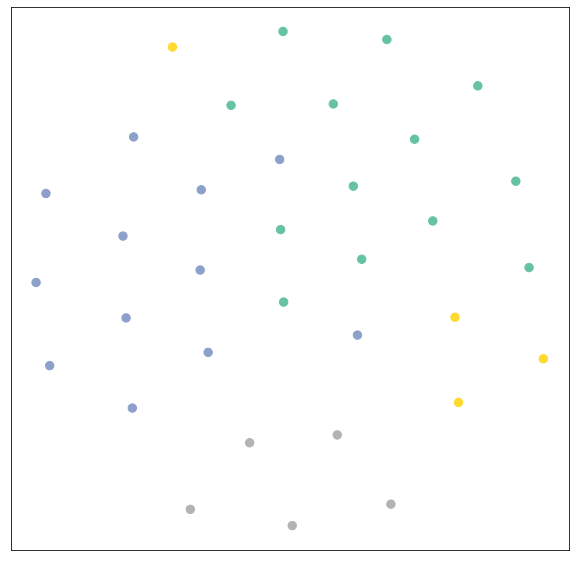

In [ ]:
visualize_tense(h, color=data.y)

In [ ]:
model.eval()
out = model(data.x, data.edge_index)
out

(tensor([[-0.2345,  4.3591, -4.4310,  0.1436],
         [ 1.3456,  2.8111, -2.9429, -1.4126],
         [ 4.3243, -0.1533, -0.0824, -4.3379],
         [ 1.0921,  3.0593, -3.1815, -1.1629],
         [-3.9170,  0.8398,  0.6012,  5.0635],
         [-3.9515,  0.8397,  0.6091,  5.1036],
         [-3.9515,  0.8397,  0.6092,  5.1036],
         [ 1.9870,  2.1490, -2.2986, -2.0382],
         [ 4.3406, -0.2136, -0.0143, -4.3460],
         [ 4.3004, -0.2671,  0.0586, -4.2896],
         [-3.9173,  0.8395,  0.6016,  5.0639],
         [-0.1352,  3.4499, -3.3691,  0.1931],
         [ 0.5090,  3.5199, -3.5986, -0.5685],
         [ 3.3199,  0.8232, -1.0195, -3.3474],
         [ 4.2715, -0.3359,  0.1473, -4.2435],
         [ 4.2691, -0.3384,  0.1509, -4.2402],
         [-3.9464,  0.8293,  0.6204,  5.0996],
         [ 0.7460,  3.2917, -3.3801, -0.8026],
         [ 4.2662, -0.3436,  0.1577, -4.2359],
         [ 3.0462,  1.0192, -1.1912, -3.0647],
         [ 4.2517, -0.3553,  0.1749, -4.2169],
         [ 0.